EDA PROJECT ON EARTHQUAKE DATA BETWEEN 1995-2023

In [2]:
#Importing Dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("D:\datascience\Dataset\earthquake_1995-2023.csv")

In [3]:
# To know how many rows and columns 
df.shape

(1000, 19)

In [4]:
#Pring the first and last five rows of the dataset
print(df.head)
print(df.tail)

<bound method NDFrame.head of                                          title  magnitude         date_time  \
0             M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47   
1     M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22   
2     M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05   
3        M 7.2 - 98 km S of Sand Point, Alaska        7.2  16-07-2023 06:48   
4                     M 7.3 - Alaska Peninsula        7.3  16-07-2023 06:48   
..                                         ...        ...               ...   
995          M 7.1 - 85 km S of Tungor, Russia        7.1  27-05-1995 13:03   
996     M 7.7 - 249 km E of Vao, New Caledonia        7.7  16-05-1995 20:12   
997  M 6.9 - 27 km NNW of Maubara, Timor Leste        6.9  14-05-1995 11:33   
998           M 6.6 - 10 km W of Aianí, Greece        6.6  13-05-1995 08:47   
999  M 7.1 - 14 km NE of Cabatuan, Philippines        7.1  05-05-1995 03:53   

     cdi  mmi   alert

In [5]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [6]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [7]:
#Check if there are any missing values and count the number of misiing values
df.isna().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

Questions and its solution related to the dataset

In [8]:
#How many earthquakes were recorded between 1995 and 2023?
num_earthquakes = df.shape[0]
print(f"Number of Earthquakes: {num_earthquakes}")

Number of Earthquakes: 1000


In [14]:
#How many earthquakes occurred between 12:00 PM and 7:00 PM based on the recorded date and time?

time_column = 'date_time'
df[time_column] = pd.to_datetime(df[time_column], format='%d-%m-%Y %H:%M', errors='coerce')
df = df.dropna(subset=[time_column])
filtered_df = df[(df[time_column].dt.hour >= 12) & (df[time_column].dt.hour < 19)]
print("Number of earthquakes between 12:00 PM and 7:00 PM:", len(filtered_df))





Number of earthquakes between 12:00 PM and 7:00 PM: 312


In [45]:
#What is the average magnitude of earthquakes during this period?
avg_magnitude = df['magnitude'].mean()
print(f"Average Magnitude: {avg_magnitude:.2f}")

Average Magnitude: 6.94


In [50]:
#What are the minimum and maximum magnitudes recorded?

min_magnitude = df['magnitude'].min()
max_magnitude = df['magnitude'].max()
print(f"Minimum Magnitude: {min_magnitude}")
print(f"Maximum Magnitude: {max_magnitude}")

Minimum Magnitude: 6.5
Maximum Magnitude: 9.1


Top 10 Most Affected Countries:
 country
Indonesia                   140
Papua New Guinea             81
Chile                        42
Vanuatu                      36
Mexico                       31
Japan                        26
Peru                         26
Solomon Islands              25
United States of America     24
Philippines                  23
Name: count, dtype: int64


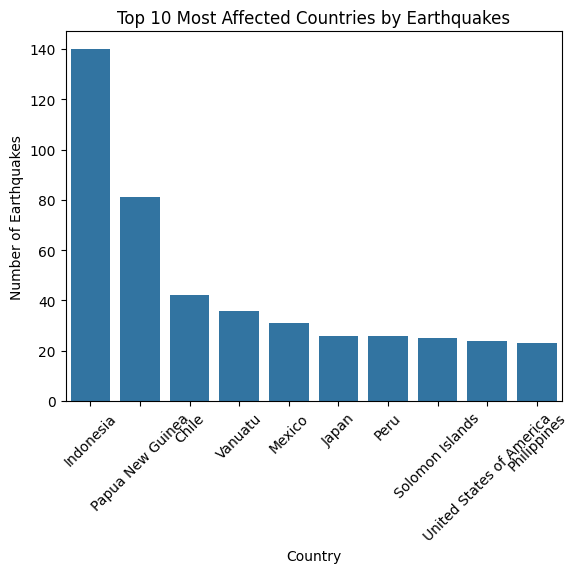

In [47]:
#Which countries or regions experienced the most earthquakes?
#What are the top 10 most affected areas by earthquake frequency?
#Are there specific areas with consistently high earthquake magnitudes?
top_countries = df['country'].value_counts().head(10)
print("Top 10 Most Affected Countries:\n", top_countries)

sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Most Affected Countries by Earthquakes')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17156\384473784.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Year'] = pd.to_datetime(df['date_time']).dt.year


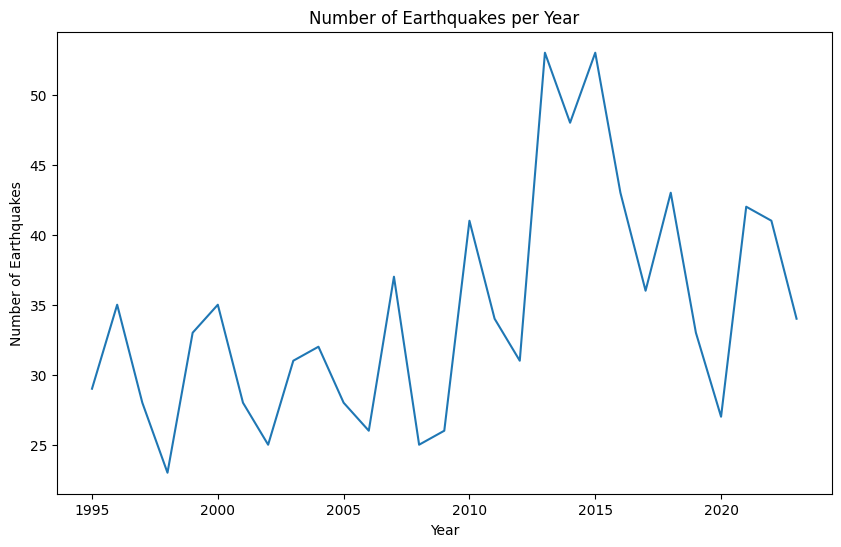

In [48]:
#Find the number of earthquakes per year
df['Year'] = pd.to_datetime(df['date_time']).dt.year
yearly_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_17156\3190469357.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Month'] = pd.to_datetime(df['date_time']).dt.month
C:\Users\USER\AppData\Local\Temp\ipykernel_17156\3190469357.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')


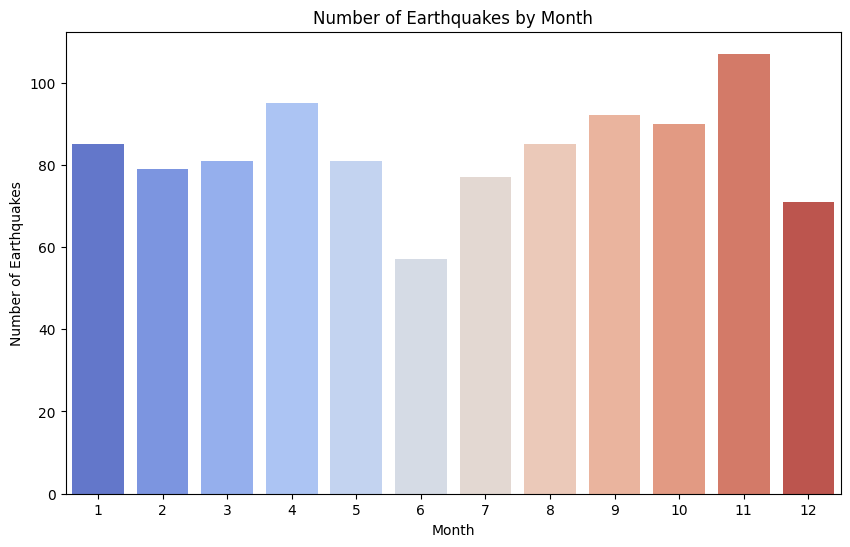

In [49]:
# Bar plot of earthquake counts by month
df['Month'] = pd.to_datetime(df['date_time']).dt.month
monthly_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')
plt.title('Number of Earthquakes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_24744\2108521232.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['month'], palette="viridis")


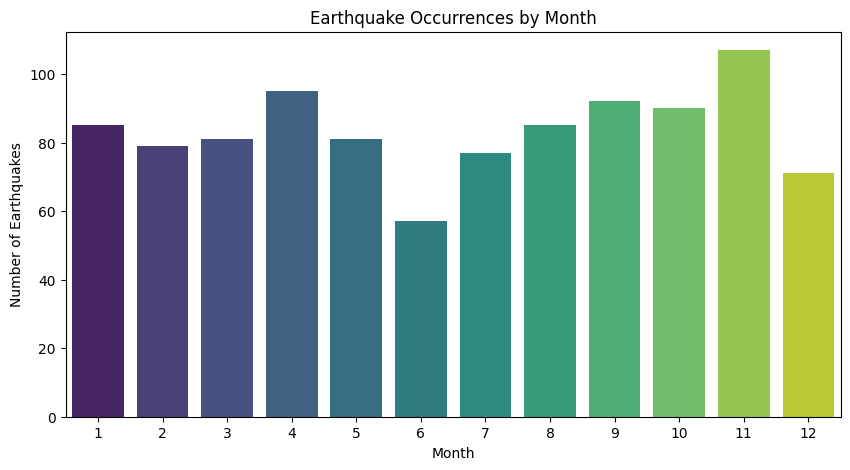

C:\Users\USER\AppData\Local\Temp\ipykernel_24744\2108521232.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['day_of_week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")


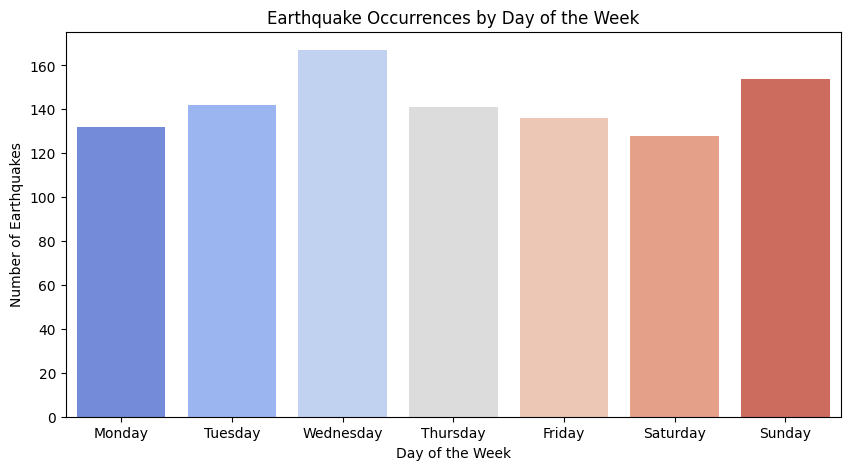

C:\Users\USER\AppData\Local\Temp\ipykernel_24744\2108521232.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['hour'], palette="magma")


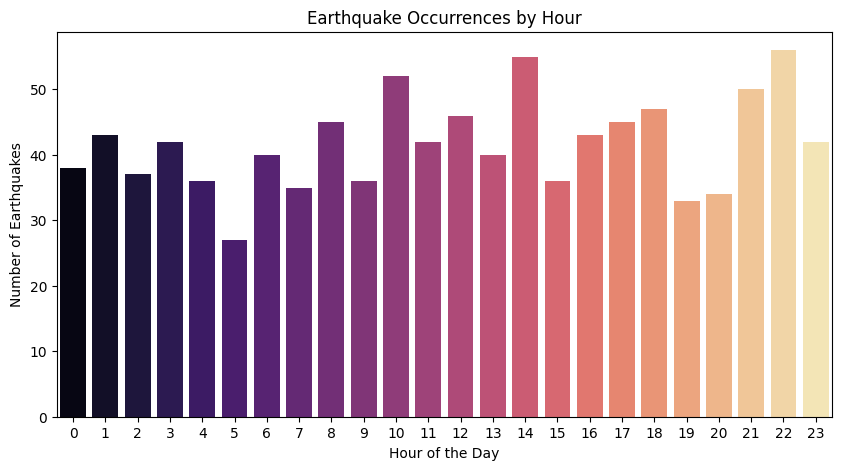

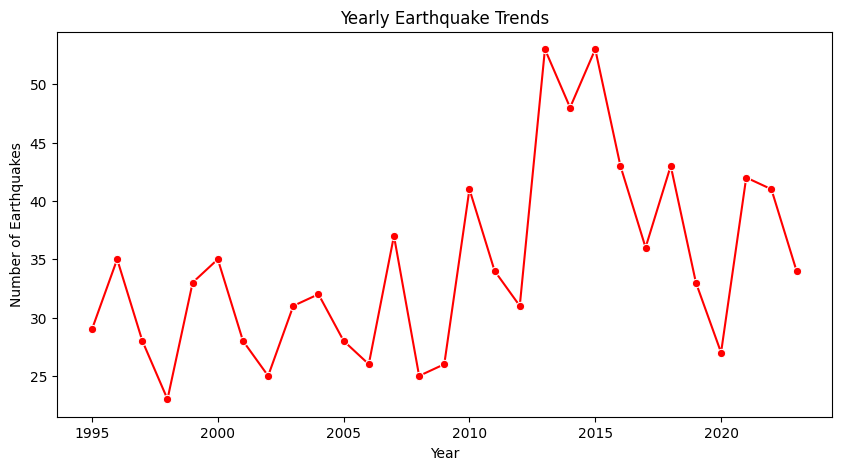

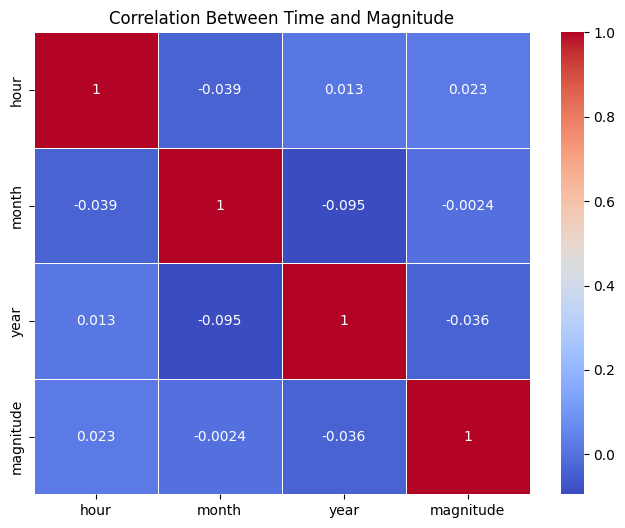

In [17]:
#Are there identifiable patterns in earthquake occurrences based on time (hour, day, month, and year) that could help in predicting future earthquakes?
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day_of_week'] = df['date_time'].dt.day_name()
df['hour'] = df['date_time'].dt.hour

#1. Monthly Earthquake Trends**
plt.figure(figsize=(10,5))
sns.countplot(x=df['month'], palette="viridis")
plt.xlabel("Month")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquake Occurrences by Month")
plt.show()

#2. Daily Earthquake Trends**
plt.figure(figsize=(10,5))
sns.countplot(x=df['day_of_week'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquake Occurrences by Day of the Week")
plt.show()

#3. Hourly Earthquake Trends**
plt.figure(figsize=(10,5))
sns.countplot(x=df['hour'], palette="magma")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquake Occurrences by Hour")
plt.show()

#4. Yearly Earthquake Trends**
plt.figure(figsize=(10,5))
sns.lineplot(x=df['year'].value_counts().index, y=df['year'].value_counts().values, marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Yearly Earthquake Trends")
plt.show()

# 📌 **5. Correlation Analysis (Optional, if magnitude column exists)**
if 'magnitude' in df.columns:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[['hour', 'month', 'year', 'magnitude']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Between Time and Magnitude")
    plt.show()


